# Justice in Work!

This project is the challenge of [Rahnema College](https://rahnemacollege.com/courses/machine_learning_advanced) entrance test. You can read the project description from [here](https://rahnemacollege.com/api/resources/RC_ML_Tuning_attachment(2)56145744.pdf).

 So lets dive into it:


## 1. Data Exploration

As we all know, data engineering and preparing a clean and efficient dataset for feeding into each machine learning model is the most important and primary step for each ML task.

So first of all, we must know what's going on in this dataset.


In [8]:
import pandas as pd
import numpy as np


# Filter all the warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
## Read csv into the pandas dataframe! Pandas will help us a lot as always :)
url = 'https://raw.githubusercontent.com/mohammadhashemii/Justice-In-Work/master/dataset.csv'
df = pd.read_csv(url, skipfooter=1)
print('the shape of the dataset: {}\n'.format(df.shape))
df.head(10)

the shape of the dataset: (24854, 14)



,id,ProId,ProCreationTimestamp,CustId,CustCreationTimestamp,Rate,TaskCreationTimestamp,Price,ServiceId,CategoryId,ZoneId,TaskState,TargetProId,isFraud
0,VkSa32MyS738HMkfk4tEfk,vqUkxUDuEmB7gHWQvcYrBn,1552751751302,SgcxJApdnttAvEN9865TSZ,1565441404199,5,1565608270089,362000.0,bKv8JeCDhHBCe8SnfDcv66,VzkJEPR5H3mnqctJ8TW3YS,98DpwFpuLYJtF6jajghriE,Finished,vqUkxUDuEmB7gHWQvcYrBn,False
1,FDPHLhrcjx3Gww4syg43Po,KaLEhwzZxCQ7GjPmVwBVav,1558262535289,EveEDVPDDDq3Ljh3bg8Exn,1561655121208,5,1563280381472,NaN,aegfi8HeWASAP6a9YkddeL,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,YvvjyjpmXxj43RJGBHPq2n,False
2,6Z7CCQoHpC8ga8KZbsgUbx,pybDYgTiCUv3Pv3WLgxKCM,1558538960723,mrDLWRmWuxGD7TVPAsD5X6,1545554406049,1,1566297337468,NaN,uDHVz7XXXRCkGKWRUe2jKp,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
3,n5DKFF8SJYoP57ypvpCEg5,zqPiDV33KwrMBZoyeQXMJW,1507727811649,aK3MnLeQywfLYMJJNyu7i8,1512288789660,4,1522825078700,NaN,Jy7nZvUqvwDUhcAG59wPcg,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
4,oCwEhmYhhzHkuZyqQCusFU,CR8z3ThPyzBKXFqqzemQAS,1560860808052,vHjzucgXFu9eA9YhuEeuk4,1561328838459,1,1564542737897,150000.0,f8o6yBmfeJiUTAmvpRCFAZ,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
5,trx3Lbf5YnjBbrTXzK3koK,gUbx9x9A73Drkb4QBJPpgh,1528991031333,eKCFEXnAyJdpWeM4XrFL4x,1532416728300,1,1532508168544,180000.0,aAkNmQxRakik386nZvYv9d,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
6,TyoLDBkbLomR6JMBuXcvUg,qx7qastwRLkRQEY2D6CSiB,1543148772561,ZEcVyk4i5BdWbcvjWUymga,1562500851511,1,1569828225868,390000.0,sDRRkkrrCx3krdGsGqwhFR,VzkJEPR5H3mnqctJ8TW3YS,4vmCuHsVCshaWa5e5WxrNK,Finished,NaN,False
7,PuqCTy4iZy36sTD5KBkBxJ,3hMiDjJx4Wo9NzKhpbTdR9,1546097644408,SdzLWkrqqzEWyZQEHo27DG,1555057077422,5,1555149245735,60000.0,UX7m6RWnKWvmw82URCyUMB,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
8,XjptSnKJYGV8fF6vrGyKLV,CY8WkG7JuedDkBneeiEchJ,1559027786245,oehNxzBhToswdDfqhNqoaL,1560547512948,5,1560671323376,40000.0,aAkNmQxRakik386nZvYv9d,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
9,WEAC7xxtjguArBgwTuzubR,dkwSgXTyPhgfX7xQvq9PTm,1546670392940,puiQeyYywKet8giy4Fojze,1552319507877,5,1567321350566,140000.0,6WeBuz5wLE3oAbPmKWD4ex,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False


### 1.1 Are all the features useful?

This is an important question which we should care about! As we saw in the previous cell, there are 14 features and most of them are **categorical**!

So what's next?! How many unique values do each of these features have?! How many features will we have after converting these categorical into one-hot encoded features?

Firstly, lets see the number of unique values of each feature:

In [10]:
## to see the number of unique values for each feature in the dataframe
for col in df.columns:
    n_unique = len(df[col].unique())

    print('Number of unique values for', col, 'is', n_unique)
 

Number of unique values for id is 24854
Number of unique values for ProId is 4161
Number of unique values for ProCreationTimestamp is 4043
Number of unique values for CustId is 19283
Number of unique values for CustCreationTimestamp is 19283
Number of unique values for Rate is 9
Number of unique values for TaskCreationTimestamp is 24853
Number of unique values for Price is 697
Number of unique values for ServiceId is 213
Number of unique values for CategoryId is 8
Number of unique values for ZoneId is 43
Number of unique values for TaskState is 3
Number of unique values for TargetProId is 981
Number of unique values for isFraud is 2


So, you see! There are lots of unique values! For instance, *id* has the same unique values as number of the records in the dataset!

It means some features have no specific information for predicting whether the service request is fraud or not. 

They are *id*, *CustId*, *ZoneId*, *ServiceId* . They are just showing the identification of the users and cannot have such impact on the goal of the problem.


In [11]:
useful_cols = ['isFraud', 'Rate', 'Price' , 'ProId', 'CategoryId', 'TaskState', 'TargetProId', 'ProCreationTimestamp', 'CustCreationTimestamp', 'TaskCreationTimestamp']

df = df[useful_cols]
print('the shape of the dataset: {}\n'.format(df.shape))
df.head(10)

the shape of the dataset: (24854, 10)



,isFraud,Rate,Price,ProId,CategoryId,TaskState,TargetProId,ProCreationTimestamp,CustCreationTimestamp,TaskCreationTimestamp
0,False,5,362000.0,vqUkxUDuEmB7gHWQvcYrBn,VzkJEPR5H3mnqctJ8TW3YS,Finished,vqUkxUDuEmB7gHWQvcYrBn,1552751751302,1565441404199,1565608270089
1,False,5,NaN,KaLEhwzZxCQ7GjPmVwBVav,VzkJEPR5H3mnqctJ8TW3YS,Finished,YvvjyjpmXxj43RJGBHPq2n,1558262535289,1561655121208,1563280381472
2,False,1,NaN,pybDYgTiCUv3Pv3WLgxKCM,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1558538960723,1545554406049,1566297337468
3,False,4,NaN,zqPiDV33KwrMBZoyeQXMJW,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1507727811649,1512288789660,1522825078700
4,False,1,150000.0,CR8z3ThPyzBKXFqqzemQAS,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1560860808052,1561328838459,1564542737897
5,False,1,180000.0,gUbx9x9A73Drkb4QBJPpgh,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1528991031333,1532416728300,1532508168544
6,False,1,390000.0,qx7qastwRLkRQEY2D6CSiB,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1543148772561,1562500851511,1569828225868
7,False,5,60000.0,3hMiDjJx4Wo9NzKhpbTdR9,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1546097644408,1555057077422,1555149245735
8,False,5,40000.0,CY8WkG7JuedDkBneeiEchJ,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1559027786245,1560547512948,1560671323376
9,False,5,140000.0,dkwSgXTyPhgfX7xQvq9PTm,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1546670392940,1552319507877,1567321350566


### 1.2 Generate new features

Nice! Let's discover more information about the dataset. *TargetProId* may play an important role in prediction. Let's take a look:

22303!! Most of the values of this column is null and there are 981 unique values for it. The values themseleve may not have an intresting information in it. Because it is nothing more than an id corresponding to *ProId* .

But before removing this column, let's see one thing. There may be some request which are labeled as fraud and the user has set the *TargetProId* the same as the *ProId* . Why? :) It's clear!

So instead of using *ProId* and *TargetProId* themseleves, it may be better to save a boolean value which is True when the *ProId* is the same with *TargetProId*

In [12]:
# To see how many of the fraud request has the same vaues for TargetProId and ProId
df_id = df[['ProId', 'TargetProId', 'isFraud']]
df_id
df_id.loc[(df['ProId'] == df['TargetProId']) & (df['isFraud'] == True)]

,ProId,TargetProId,isFraud
115,Jck5kmu533dMaosTtPze6R,Jck5kmu533dMaosTtPze6R,True
156,vBrocUEUcJ7eB3mzShgDbm,vBrocUEUcJ7eB3mzShgDbm,True
436,hCrZEyuEJEB4nyBQANLqzT,hCrZEyuEJEB4nyBQANLqzT,True
466,GZPXqaiG2XpPfAvXgXbf28,GZPXqaiG2XpPfAvXgXbf28,True
562,eh2AM9bNVKdo46FTD8Vvmw,eh2AM9bNVKdo46FTD8Vvmw,True
...,...,...,...
23825,2BpSXsj9QcWPCiq8sDBQhD,2BpSXsj9QcWPCiq8sDBQhD,True
24156,7VS5YaRDiwxuRVRJ8h2xTE,7VS5YaRDiwxuRVRJ8h2xTE,True
24332,Jd79hXXuRbpKUPHEug9Lhd,Jd79hXXuRbpKUPHEug9Lhd,True
24683,BhktZA8ctiaXZDES2NEoNF,BhktZA8ctiaXZDES2NEoNF,True


In [13]:
print('Number of the total fraud requests in the dataset', len(df_id.loc[df['isFraud'] == True]))

Number of the total fraud requests in the dataset 1540


In [14]:
## Wow!! 153 records of 1540 total number of fraud requests contain this scheme. So let's create our new column.

def change_TarfetProId(row):
    if str(row['TargetProId']) == str(np.nan):
        return np.nan
    if row['ProId'] == row['TargetProId']:
        return True
    else:
        return False


df['SameId'] = df.apply(change_TarfetProId, axis='columns')
df.head(10)

,isFraud,Rate,Price,ProId,CategoryId,TaskState,TargetProId,ProCreationTimestamp,CustCreationTimestamp,TaskCreationTimestamp,SameId
0,False,5,362000.0,vqUkxUDuEmB7gHWQvcYrBn,VzkJEPR5H3mnqctJ8TW3YS,Finished,vqUkxUDuEmB7gHWQvcYrBn,1552751751302,1565441404199,1565608270089,True
1,False,5,NaN,KaLEhwzZxCQ7GjPmVwBVav,VzkJEPR5H3mnqctJ8TW3YS,Finished,YvvjyjpmXxj43RJGBHPq2n,1558262535289,1561655121208,1563280381472,False
2,False,1,NaN,pybDYgTiCUv3Pv3WLgxKCM,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1558538960723,1545554406049,1566297337468,NaN
3,False,4,NaN,zqPiDV33KwrMBZoyeQXMJW,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1507727811649,1512288789660,1522825078700,NaN
4,False,1,150000.0,CR8z3ThPyzBKXFqqzemQAS,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1560860808052,1561328838459,1564542737897,NaN
5,False,1,180000.0,gUbx9x9A73Drkb4QBJPpgh,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1528991031333,1532416728300,1532508168544,NaN
6,False,1,390000.0,qx7qastwRLkRQEY2D6CSiB,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1543148772561,1562500851511,1569828225868,NaN
7,False,5,60000.0,3hMiDjJx4Wo9NzKhpbTdR9,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1546097644408,1555057077422,1555149245735,NaN
8,False,5,40000.0,CY8WkG7JuedDkBneeiEchJ,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1559027786245,1560547512948,1560671323376,NaN
9,False,5,140000.0,dkwSgXTyPhgfX7xQvq9PTm,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,1546670392940,1552319507877,1567321350566,NaN


And now let's ignore *ProId* and *TargetProId* as they are just some IDs.

In [15]:
df.drop(['ProId', 'TargetProId'], inplace=True, axis='columns')

How about time stamps? What information do they give us?

The time stamps themseleves might not share any specific information for us, but their difference may make sense. 

For instance, consider the statement below:

  *TaskCreationTimestamp	- CustCreationTimestamp = TaskCreationInterval*

Some fraud users are just created to rate their specific Pro as a high mark. So, if we generate *TaskCreationInterval*, our model might learn that creating a task and choosing an appropriate pro for that take time!
 

In [16]:
df['TaskCreationInterval'] = df['TaskCreationTimestamp'] - df['CustCreationTimestamp']
df.head()

,isFraud,Rate,Price,CategoryId,TaskState,ProCreationTimestamp,CustCreationTimestamp,TaskCreationTimestamp,SameId,TaskCreationInterval
0,False,5,362000.0,VzkJEPR5H3mnqctJ8TW3YS,Finished,1552751751302,1565441404199,1565608270089,True,166865890
1,False,5,NaN,VzkJEPR5H3mnqctJ8TW3YS,Finished,1558262535289,1561655121208,1563280381472,False,1625260264
2,False,1,NaN,VzkJEPR5H3mnqctJ8TW3YS,Finished,1558538960723,1545554406049,1566297337468,NaN,20742931419
3,False,4,NaN,VzkJEPR5H3mnqctJ8TW3YS,Finished,1507727811649,1512288789660,1522825078700,NaN,10536289040
4,False,1,150000.0,VzkJEPR5H3mnqctJ8TW3YS,Finished,1560860808052,1561328838459,1564542737897,NaN,3213899438


In [17]:
df.drop(['ProCreationTimestamp', 'CustCreationTimestamp', 'TaskCreationTimestamp'], inplace=True, axis='columns')

### 1.3 Missing Featuers

Some values for each column may be missed! In other words they have np.NaN as their values.

In data engineering, there are some known methods to deal with these missing values. Some of them are:

*   Averaging(among the other values in that column)
*   Filling with a value out of domain
*   Imputation
*   Using regression method to fill an appropriate value for it.

Lets see which columns contain missing values:


In [18]:
df.isnull().sum()

isFraud                     0
Rate                        0
Price                    5989
CategoryId                  0
TaskState                   0
SameId                  22303
TaskCreationInterval        0
dtype: int64

So thanks to the data provider, the number of features which contain missing values is not too much high. As we discussed before, *SamId* nan values are meaningful and we should not change them.

But *Price* missing values should be filled. *Price* values are some real values and using averaging for missing values is a proper idea.

So in order to fill the missing values, we can calculate the average of the prices of each group. The groups can be defined by their *CategoryId*.


Now lets group by the *CategoryId* and find the average price in each group and fill missing values within the group's average.

In [19]:
## Filling missing values with the group’s mean

df['Price'] = df.groupby('CategoryId')['Price'].transform(lambda grp: grp.fillna(np.mean(grp)))
df.head(10)

,isFraud,Rate,Price,CategoryId,TaskState,SameId,TaskCreationInterval
0,False,5,362000.000000,VzkJEPR5H3mnqctJ8TW3YS,Finished,True,166865890
1,False,5,521159.650292,VzkJEPR5H3mnqctJ8TW3YS,Finished,False,1625260264
2,False,1,521159.650292,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,20742931419
3,False,4,521159.650292,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,10536289040
4,False,1,150000.000000,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,3213899438
5,False,1,180000.000000,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,91440244
6,False,1,390000.000000,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,7327374357
7,False,5,60000.000000,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,92168313
8,False,5,40000.000000,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,123810428
9,False,5,140000.000000,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,15001842689


### 1.4 Normalization

*ProCreationTimestamp*, *CustCreationTimestamp*, *TaskCreationTimestamp* and *Price* columns contain large numbers as their values. Normalization is a statistical process in order to bring all the values within each feature in a specific range.

Why do we do this?! It helps the optimization process to converge as fast as possible. There are lots of normalization and standardization methods which can be found in [Sickit-Learn](https://scikit-learn.org/stable/modules/preprocessing.html) documentation. Most common ones are:


*   Standardization
*   Feature Scaling

Here we use standadization for mentiond columns.(Note: here I have done myself, but we usually use built-in functions in Sickit-Learn and even Pandas libraries.)




In [20]:
from sklearn.preprocessing import MinMaxScaler

## Some coulmns should be normalized
norm_cols = ['TaskCreationInterval', 'Price']

df[norm_cols] = (df[norm_cols] - df[norm_cols].min()) / (df[norm_cols].max() - df[norm_cols].min())
df.head(40)

,isFraud,Rate,Price,CategoryId,TaskState,SameId,TaskCreationInterval
0,False,5,0.001006,VzkJEPR5H3mnqctJ8TW3YS,Finished,True,0.002171
1,False,5,0.001448,VzkJEPR5H3mnqctJ8TW3YS,Finished,False,0.021141
2,False,1,0.001448,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,0.269814
3,False,4,0.001448,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,0.137051
4,False,1,0.000417,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,0.041805
5,False,1,0.000500,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,0.001189
6,False,1,0.001083,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,0.095311
7,False,5,0.000167,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,0.001199
8,False,5,0.000111,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,0.001610
9,False,5,0.000389,VzkJEPR5H3mnqctJ8TW3YS,Finished,NaN,0.195137


### 1.5 Feature Corrolations

Dependancy between features in a machine learning problem is an important thing which we should care. The question is : Are there any correlation between features? Can feature values calculated using other ones?

Here we want to see which features are correlated?




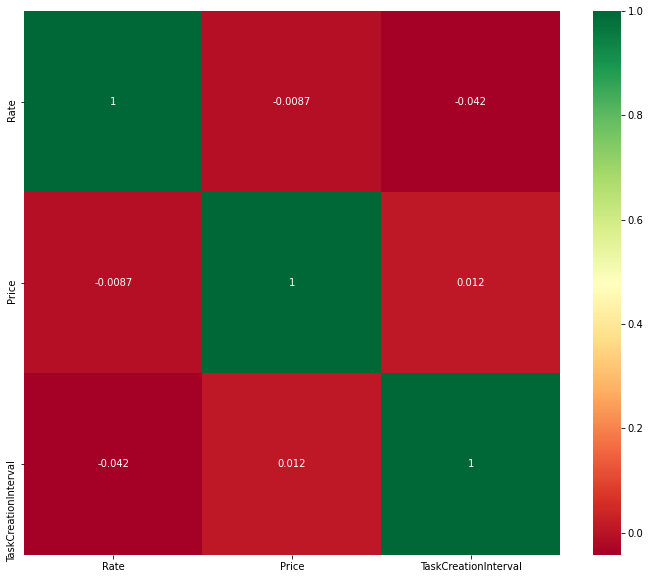

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


#get correlations of each features in dataset
corrmat = df.iloc[:, 1:].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Fortunately, most of the features are not correlated and we will keep them!

### 1.6 Categorical Features

There are two types of features in each dataset.


1.   Categorical Features(i.e. :*CategoryId*, ...)
2.   non-categorical Featrues(i.e. : *Rate*, *Price*, ...)

Clearly, categorical features type are strings and we cannot feed them into a learning model. Because they need numbers to train!

So we can use one-hot encoding method to make them numeric. 

In [22]:
#use one-hot encoding for categorical features
final_dataset=pd.get_dummies(df,  drop_first=True)
final_dataset

,isFraud,Rate,Price,TaskCreationInterval,CategoryId_HnKFgSQGdwEj7q6Z8ws4cb,CategoryId_JdqYJwUosvwivsFdThmcXe,CategoryId_L3a2wDTjmBCiSEE5nzkomU,CategoryId_VzkJEPR5H3mnqctJ8TW3YS,CategoryId_kRyJUveqktavaCXyhPdceK,CategoryId_qgqzVtnssiJTjR7tjbWW6m,CategoryId_v97njuq76L7f36VHZPbuJX,TaskState_Finished,TaskState_Waiting,SameId_True
0,False,5,0.001006,0.002171,0,0,0,1,0,0,0,1,0,1
1,False,5,0.001448,0.021141,0,0,0,1,0,0,0,1,0,0
2,False,1,0.001448,0.269814,0,0,0,1,0,0,0,1,0,0
3,False,4,0.001448,0.137051,0,0,0,1,0,0,0,1,0,0
4,False,1,0.000417,0.041805,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24849,False,5,0.001222,0.002465,0,0,0,1,0,0,0,1,0,0
24850,False,5,0.000125,0.000860,0,0,0,1,0,0,0,1,0,0
24851,False,1,0.001224,0.386471,0,1,0,0,0,0,0,1,0,0
24852,False,5,0.000278,0.002670,0,0,0,1,0,0,0,1,0,0


### 1.7 Feature Importance

Thanks to Sklearn ExtraTreeRegressor, we are able to observe which features are important to keep and which one we should get rid of.






In [23]:
y = final_dataset.iloc[:,0]
X = final_dataset.iloc[:,1:]

The figure below, shows us the importance of each feature. As we can see, we get rid of some of them:

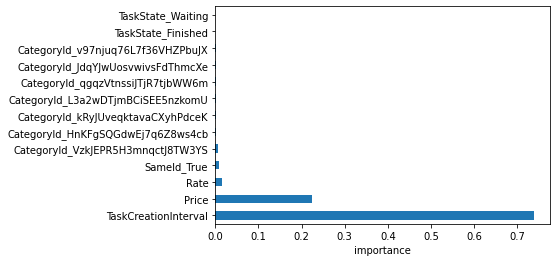

In [24]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor


model = ExtraTreesRegressor()
model.fit(X,y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(final_dataset.columns)).plot(kind='barh')
plt.xlabel('importance')
plt.show()

In [25]:
most_important_feat = feat_importances.sort_values(ascending=False)[:4].index
X = X[most_important_feat]
print('Features to stay: {}'.format(most_important_feat))

Features to stay: Index(['TaskCreationInterval', 'Price', 'Rate', 'SameId_True'], dtype='object')


### 1.8 Dealing with imbalanced dataset

Is the data distribution balanced? Lets count the labels!

In [26]:
y.value_counts()

False    23314
True      1540
Name: isFraud, dtype: int64

Oops! 😅 Only around 6% of the target values are labeled *True*. So what will happen then?

In these situations, the learning model which we suppose to teach might be biased to the class with more examples.

There are so many method to address this problem. The most two common approaches are:

1. Under sampling
2. Over sampling

In under sampling we try to reduce the examples of the class with more samples to make the dataset balanced. One of the common algorithms for that is Nearmiss algorithm.

In [27]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print('TRAIN SHAPE:{0}, TEST SHAPE:{1}'.format(X_train.shape, X_test.shape))

TRAIN SHAPE:(22368, 4), TEST SHAPE:(2486, 4)


In [28]:
y_train.value_counts()

False    20979
True      1389
Name: isFraud, dtype: int64

In [29]:
from imblearn.under_sampling import NearMiss
from collections import Counter
import matplotlib.pyplot as plt

nm = NearMiss(random_state=0, version=2, ratio=0.8) 
X_train, y_train = nm.fit_sample(X_train, y_train)
print('TRAIN: ', Counter(y_train))
print('TEST: ', Counter(y_test))

TRAIN:  Counter({False: 1736, True: 1389})
TEST:  Counter({False: 2335, True: 151})


## 2. Train

ugh :) Data now is clean enough. So finally we can do the learning part here.

There are lots of algorithms for training a supervised model. I think explaining all of them here is not a good idea! 

I just use some of them here and I will be ready to explain them in the interview in detail:)

Proposed models for this project:



*   SVMs
*   Neural Nets


### 2.1 SVM

There are various types of SVM as model based on their kernels. The common kernels are *RBF*, *Linear*, *Polynomial*. 

Different types will be trained using **Grid Search** and their wights will be saved to evalute them later.

Grid search is method for hyperparameter tuning. In other words, there are many hyperprameters for each model in a machine learning algorithm which should be set. One of the famous method is to try all of them and save the best ones.






**Cross-validation** which is set as *CV* in each model is a method to use different train-test split with same distribution.

Here CV = 5. It means we have 5-folds.

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

##SVM

# defining parameter range 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['linear', 'rbf']} 

model = GridSearchCV(SVC(verbose=True), param_grid, cv=5)
model.fit(X_train, y_train)

# print best parameter after tuning 
print(model.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(model.best_estimator_) 

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, ver

For the evalution we must use **F1-Score**! The accuracy metric cannot be a good metric here because of the skew data we have.



In [33]:
## Evaluate the model

from sklearn import metrics

## Predictions
train_predictions=model.predict(X_train)
test_predictions=model.predict(X_test)

print('Train data:')
print('precision:', metrics.precision_score(y_train, train_predictions))
print('recall:', metrics.recall_score(y_train, train_predictions))
print('f1-score:', metrics.f1_score(y_train, train_predictions))
print()
print('Test data:')
print('precision:', metrics.precision_score(y_test, test_predictions))
print('recall:', metrics.recall_score(y_test, test_predictions))
print('f1-score:', metrics.f1_score(y_test, test_predictions))


Train data:
precision: 1.0
recall: 0.9467242620590353
f1-score: 0.9726331360946745

Test data:
precision: 0.06830206830206831
recall: 0.9403973509933775
f1-score: 0.1273542600896861


In [36]:
## save the model into a pickle file to use later
import pickle
# open a file, where you ant to store the data
file = open('weights/svm.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

### 2.2 Neural Network

In [51]:
import keras.backend as K

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [52]:
## Neural Nets

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=f1_score)
                   
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,453
Trainable params: 2,453
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
98/98 [==============================] - 0s 4ms/step - loss: 0.0838 - f1_score: 0.9720 - val_loss: 5.5025 - val_f1_score: 0.1244
Epoch 2/5
98/98 [==============================] - 0s 4ms/step - loss: 0.0833 - f1_score: 0.9739 - val_loss: 5.7523 - val_f1_score: 0.1244
Epoch 3/5
98/98 [==============================] - 0s 4ms/step - loss: 0.0821 - f1_score: 0.9729 - val_loss: 5.5067 - val_f1_score: 0.1244
Epoch 4/5
98/98 [==============================] - 0s 5ms/step - loss: 0.0809 - f1_score: 0.9732 - val_loss: 5.3571 - val_f1_score: 0.1244
Epoch 5/5
98/98 [==============================] - 0s 4ms/step - loss: 0.0793 - f1_score: 0.9726 - val_loss: 6.6449 - val_f1_score: 0.1187


In [55]:
model.evaluate(X_test, y_test, verbose=1)

78/78 [==============================] - 0s 2ms/step - loss: 6.6449 - f1_score: 0.1187


[6.644904613494873, 0.11873828619718552]

In [56]:
model.save_weights('weights/NeuralNet/exp1.pkl', 'wb')

## 4. Test

Note : **If you just want to test model, you should pass the *Data Exploration* part first to clean the data and prepare it for testing.**

### 4.1 Neural Net

First, **compile** the pre-defined model in *Train* part and then run this cell.

TODO:

1. Download the weights of the model from https://github.com/mohammadhashemii/Justice-In-Work/tree/master/weights/NeuralNet

2. Put the *exp1.pkl* file inside the project directory and use it.

In [59]:
# load the pretrained model
path = 'https://github.com/mohammadhashemii/Justice-In-Work/raw/master/weights/svm.pkl'

## Compile the model

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=f1_score)

#Load the weights
path='weights/NeuralNet/exp1.pkl'

print('Weights loaded from {}\n'.format(path))
model.load_weights(path)

model.evaluate(X_test, y_test, verbose=1)

Weights loaded from weights/NeuralNet/exp1.pkl

78/78 [==============================] - 0s 2ms/step - loss: 6.6378 - f1_score: 0.1035


[6.644904613494873, 0.11873828619718552]

### 4.2 SVM

In [ ]:
# load the pretrained model
path = 'https://github.com/mohammadhashemii/Justice-In-Work/raw/master/weights/svm.pkl'
loaded_model = pd.read_pickle(path)

train_result = loaded_model.score(X_train, y_train)
test_result = loaded_model.score(X_test, y_test)

print('Weights loaded from {}\n'.format(path))
print('TRAIN DATA ACCURACY: {}%, TEST DATA ACCURACY: {}%'.format(train_result*100, test_result*100))

In [43]:
from sklearn import metrics
import pickle

#file = open('weights/svm.pkl', 'rb')
#loaded_model = pickle.load(file)

## Predictions
train_predictions=loaded_model.predict(X_train)
test_predictions=loaded_model.predict(X_test)

print('precision:', metrics.precision_score(y_train, train_predictions))
print('recall:', metrics.recall_score(y_train, train_predictions))
print('f1-score:', metrics.f1_score(y_train, train_predictions))
print()
print('precision:', metrics.precision_score(y_test, test_predictions))
print('recall:', metrics.recall_score(y_test, test_predictions))
print('f1-score:', metrics.f1_score(y_test, test_predictions))



precision: 1.0
recall: 0.9467242620590353
f1-score: 0.9726331360946745

precision: 0.06830206830206831
recall: 0.9403973509933775
f1-score: 0.1273542600896861


## 5. Conclusion

Due to the imbalance data for testset, the model is not able to achieve appropriate results! :(